# 과제 : 데이터 분석

<데이터 분석 질문>

1.    기본 분석 및 데이터 전처리를 수행하고 결과를 설명하세요.

2.    상세 분석 및 프로세스 분석

         i.            현재 수리 프로세스가 어떻게 진행되고 있는지 설명하세요.

       ii.            현재 프로세스의 문제점(병목현상, 반복작업 등)을 분석하세요.

     iii.            케이스 소요 시간에 영향을 미치는 데이터 요소가 있다면, 이를 제시하고 근거를 설명하세요. 

3.    현재 프로세스를 개선할 수 있는 방안에 대해 서술하세요

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# mobile data
data_path = "repair3.csv"
data = pd.read_csv(data_path, index_col = 0)
data.head()

,caseID,taskID,originator,eventtype,date,time
0,419,InformClientSurvey,System,complete,2020-01-06,11:51
1,561,ArrangeSurvey,Monica,complete,2020-01-07,13:48
2,902,ReadyInformClient,System,complete,2020-01-08,16:20
4,852,Survey,Edd,complete,2020-01-10,11:33
5,450,TicketReady,System,complete,2020-01-11,21:48


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	CaseID	|	집 수리 요청 접수 번호	|	int |
|	TaskID	|	업무	|	Object	|
|	Originator	|	업무 담당자 |	Object	|
|	Eventtype	|	업무의 시작(start)과 끝(complete)을 표시	|	Object	|
|	Contact	|	집 수리 요청의 요청 채널('Phone','Web','Personal',Letter')	|	Object	|
|	RepairType	|	수리 방식('True', 'False')|	Object	|
|	ObjectKey	|	 수리 대상 집 key	|	float	|
|	RepairInternally	|	내부 수리 여부('True, 'False')	|	object	|
|	EstimatedRepairTime	|	예상 수리 시간(60.0 ~ 480.0)	|	float	|
|	RepairCode	|	수리 종류(1.0 ~ 4.0)	|	float	|
|	RepairOK	|	수리 정상 종류 여부('True')	|	object	|
|	Date	|	업무 수행 일자	|	object	|
|	Time	|	업무 수행 시각	|	object	|


### 1. 기본 분석 및 데이터 전처리를 수행하고 결과를 설명하세요.

* 앞선 단변량 분석을 통해 "RepairOK"의 컬럼은 무의미한 데이터인것을 확인할 수 있었습니다.

* 이벤트 로그를 만들기 위한 필요한 컬럼들만 불러옵니다.

In [46]:
list(data)

['caseID', 'taskID', 'originator', 'eventtype', 'date', 'time']

- cseID && Date

In [47]:
Date = pd.to_datetime(data['date'])

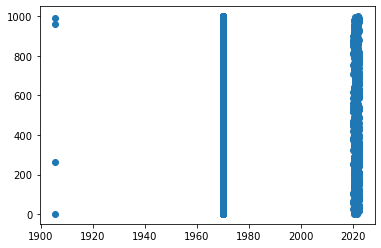

In [48]:
plt.scatter(Date,data['caseID'])
plt.show()

* caseID별로 date를 시각해본 결과, 1970년도와 2020년도이상에 데이터가 몰려 있는 것을 알 수 있습니다. 하지만, 여기서 의문점이 2가지가 생깁니다.
------------------------------------------------------------------

-> 1. 1970년 데이터가 과연 올바르게 입력된 데이터일까? 2020데이터를 잘못 기입했을 것이라 생각하고 데이터를 변환하도록 하겠습니다.

-> 2. 1900년도 데이터는 뭘까? 이상치라고 판하겠습니다.


- date 컬럼의 1970 --> 2020으로 변경하기

In [49]:
data["date"] = data["date"].str.replace("1970", "2020")

In [50]:
data["date"].head()

0    2020-01-06
1    2020-01-07
2    2020-01-08
4    2020-01-10
5    2020-01-11
Name: date, dtype: object

- 새로운 컬럼 만들기 = data + time

In [51]:
data["DateTime"] = data["date"] + " " + data["time"]

In [52]:
# datetime 타입으로 변환 
data['DateTime'] = pd.to_datetime(data['DateTime'])

In [53]:
data.head()

,caseID,taskID,originator,eventtype,date,time,DateTime
0,419,InformClientSurvey,System,complete,2020-01-06,11:51,2020-01-06 11:51:00
1,561,ArrangeSurvey,Monica,complete,2020-01-07,13:48,2020-01-07 13:48:00
2,902,ReadyInformClient,System,complete,2020-01-08,16:20,2020-01-08 16:20:00
4,852,Survey,Edd,complete,2020-01-10,11:33,2020-01-10 11:33:00
5,450,TicketReady,System,complete,2020-01-11,21:48,2020-01-11 21:48:00


- 이상치 데이터 삭제 (2020년 미만 데이터)

In [54]:
data = data[data["date"] >= "1970-01-01"]

In [55]:
data = data.drop(["date","time"], axis = 1)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9417 entries, 0 to 13261
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   caseID      9417 non-null   int64         
 1   taskID      9417 non-null   object        
 2   originator  9417 non-null   object        
 3   eventtype   9417 non-null   object        
 4   DateTime    9417 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 441.4+ KB


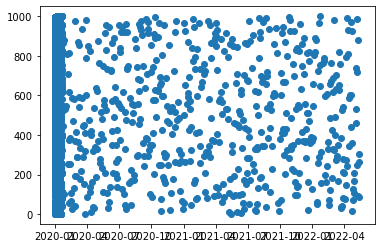

In [57]:
plt.scatter(data['DateTime'],data['caseID'])
plt.show()

In [58]:
data = data.sort_values(by = ["caseID","DateTime"])

In [59]:
list(data)

['caseID', 'taskID', 'originator', 'eventtype', 'DateTime']

## 프로세스 마이닝 전 Event log로 확인해 보기

In [60]:
#사용할 특성만 남김
# 이벤트 = [케이스아이디, 언제, 액티비티, 작업자,엑티비티 상태]
Event = data[['caseID','DateTime','taskID','originator','eventtype']]

In [61]:
Event["taskID"].value_counts()

FirstContact              997
Survey                    929
ArrangeSurvey             928
MakeTicket                927
RepairReady               927
ReadyInformClient         927
TicketReady               926
InformClientSurvey        926
SendTicketToFinAdmin      926
InternRepair              547
ImmediateRepair           384
InformClientWrongPlace     73
Name: taskID, dtype: int64

In [62]:
#taskID의 빈도를 알아보기 가변수화
task_count = pd.get_dummies(data.taskID)

In [63]:
task_count.head()

,ArrangeSurvey,FirstContact,ImmediateRepair,InformClientSurvey,InformClientWrongPlace,InternRepair,MakeTicket,ReadyInformClient,RepairReady,SendTicketToFinAdmin,Survey,TicketReady
4035,0,0,0,0,0,0,1,0,0,0,0,0
4561,1,0,0,0,0,0,0,0,0,0,0,0
9171,0,0,0,1,0,0,0,0,0,0,0,0
3835,0,0,0,0,0,0,0,0,0,0,1,0
1994,0,0,0,0,0,1,0,0,0,0,0,0


In [64]:
Event.drop("taskID",axis = 1)
Event = pd.concat([Event,task_count],axis=1)

In [65]:
list(Event)

['caseID',
 'DateTime',
 'taskID',
 'originator',
 'eventtype',
 'ArrangeSurvey',
 'FirstContact',
 'ImmediateRepair',
 'InformClientSurvey',
 'InformClientWrongPlace',
 'InternRepair',
 'MakeTicket',
 'ReadyInformClient',
 'RepairReady',
 'SendTicketToFinAdmin',
 'Survey',
 'TicketReady']

- originator별 업무 횟수 파악

In [89]:
case = Event.groupby("caseID").sum()

In [91]:
case.head()

,ArrangeSurvey,FirstContact,ImmediateRepair,InformClientSurvey,InformClientWrongPlace,InternRepair,MakeTicket,ReadyInformClient,RepairReady,SendTicketToFinAdmin,Survey,TicketReady
caseID,,,,,,,,,,,,
1,1,0,0,1,0,1,1,1,1,1,1,1
2,1,1,1,1,0,0,1,1,1,1,1,1
3,1,1,0,1,0,1,1,1,1,1,1,1
4,1,1,1,1,0,0,1,1,1,1,1,1
5,1,1,1,1,0,0,1,1,1,1,1,1


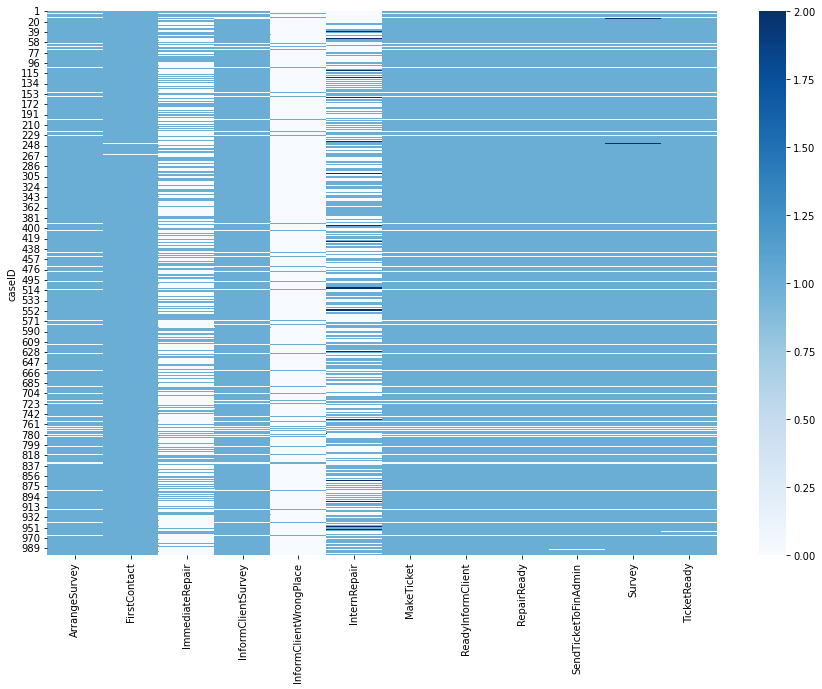

In [92]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(case,cmap='Blues',vmin=0, vmax=2)
plt.show()

* immediateRepair와 informClientWrongPlace를 사용하는 case들이 적습니다.
* 만약 직원의 배치가 다른 업무보다 많이 배치 되어 있다면 분산하는것이 좋을 것이라 판단됩니다.

In [86]:
originator = Event.groupby('originator').sum()

In [87]:
originator.head()

,caseID,ArrangeSurvey,FirstContact,ImmediateRepair,InformClientSurvey,InformClientWrongPlace,InternRepair,MakeTicket,ReadyInformClient,RepairReady,SendTicketToFinAdmin,Survey,TicketReady
originator,,,,,,,,,,,,,
Anne,204935,0.0,0.0,185.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,217.0,0.0
Barbara,103975,0.0,0.0,88.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,111.0,0.0
Ben,35520,0.0,0.0,4.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,35.0,0.0
Cindy,98681,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,94.0,0.0
Dian,697953,440.0,464.0,0.0,0.0,29.0,0.0,437.0,0.0,0.0,0.0,1.0,0.0


In [68]:
originator = originator.drop('caseID',axis=1)

In [69]:
originator.head()

,ArrangeSurvey,FirstContact,ImmediateRepair,InformClientSurvey,InformClientWrongPlace,InternRepair,MakeTicket,ReadyInformClient,RepairReady,SendTicketToFinAdmin,Survey,TicketReady
originator,,,,,,,,,,,,
Anne,0.0,0.0,185.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,217.0,0.0
Barbara,0.0,0.0,88.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,111.0,0.0
Ben,0.0,0.0,4.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,35.0,0.0
Cindy,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,94.0,0.0
Dian,440.0,464.0,0.0,0.0,29.0,0.0,437.0,0.0,0.0,0.0,1.0,0.0


In [70]:
total = originator[originator.columns].sum(axis=1)

In [71]:
total

originator
Anne        432.0
Barbara     214.0
Ben          60.0
Cindy       194.0
Dian       1371.0
Edd         186.0
Eric         49.0
Jacky       220.0
John        198.0
Lex          56.0
Monica     1555.0
Nick         54.0
Paul        193.0
System     4635.0
dtype: float64

In [72]:
originator = pd.concat([originator,total],axis=1)

In [73]:
originator.rename(columns={0:'total'},inplace=True)

In [74]:
originator.reset_index(inplace=True)

In [81]:
originator

,originator,ArrangeSurvey,FirstContact,ImmediateRepair,InformClientSurvey,InformClientWrongPlace,InternRepair,MakeTicket,ReadyInformClient,RepairReady,SendTicketToFinAdmin,Survey,TicketReady,total
0,Anne,0.0,0.0,185.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,217.0,0.0,432.0
1,Barbara,0.0,0.0,88.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,111.0,0.0,214.0
2,Ben,0.0,0.0,4.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,35.0,0.0,60.0
3,Cindy,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,94.0,0.0,194.0
4,Dian,440.0,464.0,0.0,0.0,29.0,0.0,437.0,0.0,0.0,0.0,1.0,0.0,1371.0
5,Edd,0.0,0.0,0.0,0.0,0.0,105.0,0.0,0.0,0.0,0.0,81.0,0.0,186.0
6,Eric,0.0,0.0,4.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,23.0,0.0,49.0
7,Jacky,0.0,0.0,93.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,110.0,0.0,220.0
8,John,0.0,0.0,0.0,0.0,0.0,97.0,0.0,0.0,0.0,0.0,101.0,0.0,198.0
9,Lex,0.0,0.0,7.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,27.0,0.0,56.0


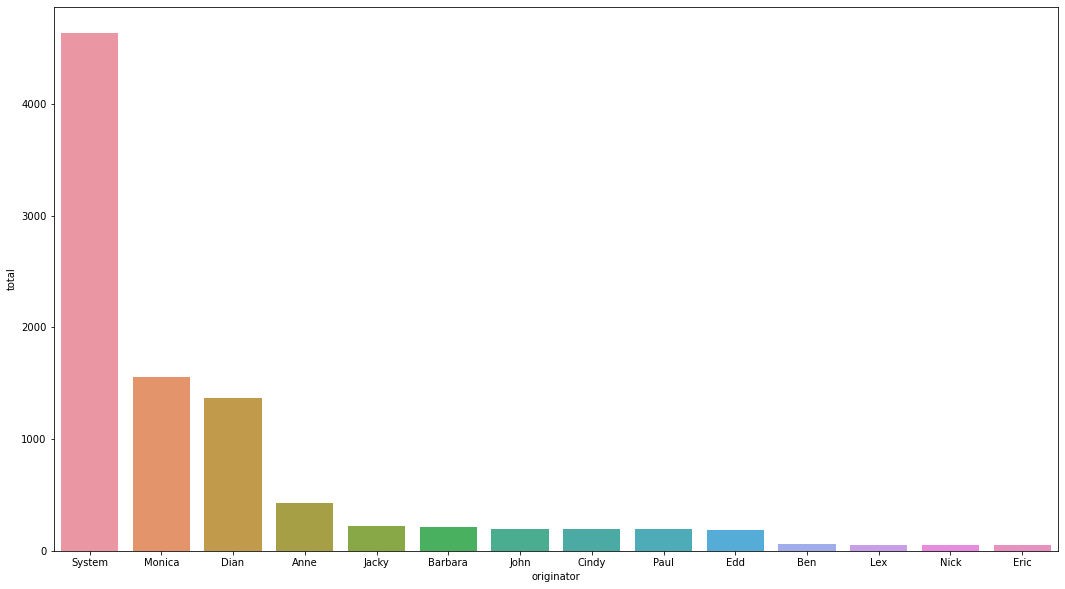

In [76]:
plt.figure(figsize=(18,10))
sns.barplot(data = originator.sort_values(by="total", ascending=False), x ="originator", y ="total")
plt.show()

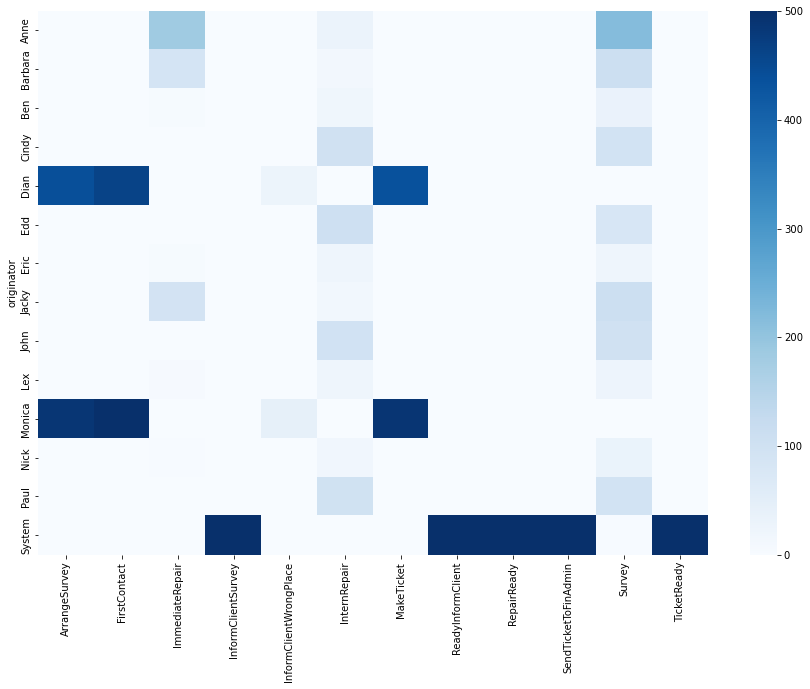

In [85]:
originator = originator.drop('caseID',axis=1)
plt.figure(figsize=(15,10))
ax = sns.heatmap(originator,cmap='Blues',vmax=500)
plt.show()

* 그룹별로 originator 확인해본 결과 앞선 단별량 분석과 동일한 결과값이 나오것을 알 수 있습니다

* System 경우 많은 종류의 task 업무를 맡고 업무량도 많아서 병목현상의 원인이 될것이라 예상이 됩니다 --> 만약 그렇다면 직원들을 교육하여 업무를 분삼하거나 직원을 늘리는 것이 해결책이 될 것 같습니다

In [78]:
Event

,caseID,DateTime,taskID,originator,eventtype,ArrangeSurvey,FirstContact,ImmediateRepair,InformClientSurvey,InformClientWrongPlace,InternRepair,MakeTicket,ReadyInformClient,RepairReady,SendTicketToFinAdmin,Survey,TicketReady
4035,1,2020-01-02 08:11:00,MakeTicket,Dian,complete,0,0,0,0,0,0,1,0,0,0,0,0
4561,1,2020-01-02 08:16:00,ArrangeSurvey,Dian,complete,1,0,0,0,0,0,0,0,0,0,0,0
9171,1,2020-01-02 08:16:00,InformClientSurvey,System,complete,0,0,0,1,0,0,0,0,0,0,0,0
3835,1,2020-01-11 21:56:00,Survey,Cindy,complete,0,0,0,0,0,0,0,0,0,0,1,0
1994,1,2020-01-17 08:12:00,InternRepair,John,complete,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,1000,2020-01-19 18:34:00,RepairReady,System,complete,0,0,0,0,0,0,0,0,1,0,0,0
8609,1000,2020-01-19 18:34:00,InternRepair,John,complete,0,0,0,0,0,1,0,0,0,0,0,0
2987,1000,2020-01-20 02:25:00,ReadyInformClient,System,complete,0,0,0,0,0,0,0,1,0,0,0,0
3604,1000,2020-01-20 02:25:00,TicketReady,System,complete,0,0,0,0,0,0,0,0,0,0,0,1


In [79]:
# 프로세싱 마이닝 할 데이터 따로 저장
Event.to_csv("repair4.csv")